<a href="https://colab.research.google.com/github/ORUNSOLU/Practice/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attached below is a link to the asssignment

https://dphi.tech/challenges/deep-learning-bootcamp-assignment-1-intermediate-object-recognition/28/data

Import the required libraries

In [65]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow import keras

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')

Load the data

In [58]:
(x_train, y_train), (_, __) = load_data()
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
x_train = x_train/255.0

Split the data into training and validation

In [59]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

Display some images

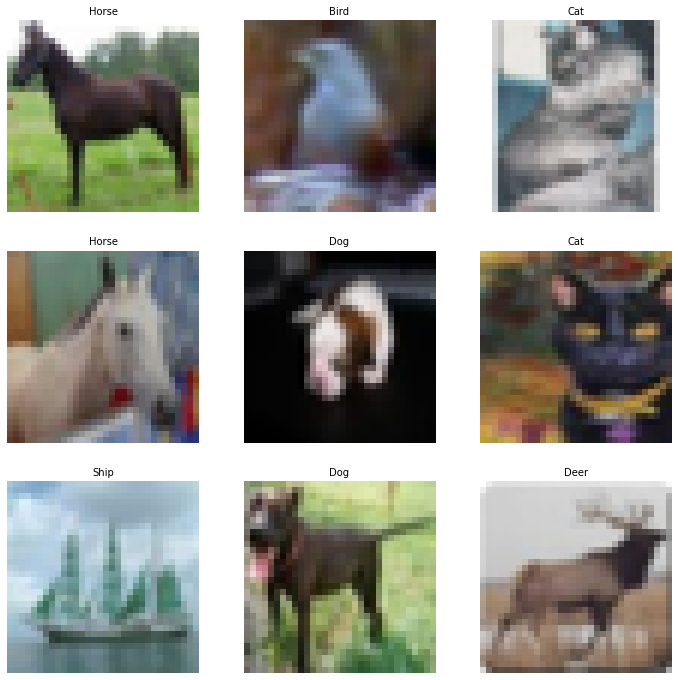

In [42]:
plt.figure(figsize=(12, 12))

for i in range(9):
  image_name = labels[int(y_train[i])]
  plot = plt.subplot(3, 3, i+1)
  plot.axis('off')
  image = Image.fromarray(x_train[i], 'RGB')
  plot.set_title(image_name, fontsize=10)
  plt.imshow(image)

plt.show()

Build the model

In [90]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='SAME',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 512)             

Add CallBack

In [89]:
checkPoint_cb = keras.callbacks.ModelCheckpoint('model_cp.h5', save_best_only=True)

Compile the Model

In [92]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=12, validation_data=(x_val, y_val), callbacks=[checkPoint_cb])


Epoch 1/12
1329/1329 [==============================] - 6s 4ms/step - loss: 0.5009 - accuracy: 0.8259 - val_loss: 0.8769 - val_accuracy: 0.7164
Epoch 2/12
1329/1329 [==============================] - 5s 4ms/step - loss: 0.4738 - accuracy: 0.8369 - val_loss: 0.8977 - val_accuracy: 0.7172
Epoch 3/12
1329/1329 [==============================] - 6s 4ms/step - loss: 0.4591 - accuracy: 0.8411 - val_loss: 0.8924 - val_accuracy: 0.7208
Epoch 4/12
1329/1329 [==============================] - 6s 4ms/step - loss: 0.4433 - accuracy: 0.8480 - val_loss: 0.9214 - val_accuracy: 0.7153
Epoch 5/12
1329/1329 [==============================] - 6s 4ms/step - loss: 0.4319 - accuracy: 0.8506 - val_loss: 0.9076 - val_accuracy: 0.7223
Epoch 6/12
1329/1329 [==============================] - 6s 4ms/step - loss: 0.4199 - accuracy: 0.8539 - val_loss: 0.9128 - val_accuracy: 0.7177
Epoch 7/12
1329/1329 [==============================] - 5s 4ms/step - loss: 0.4067 - accuracy: 0.8603 - val_loss: 0.9345 - val_accuracy:

VIew the training and Validation loss & accuracy

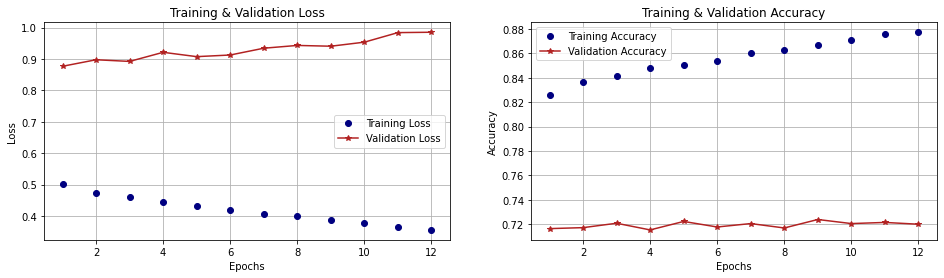

In [93]:
def show_plots(history):
  """ Useful function to view plot of loss values & accuracies across the various epochs """
  loss_vals = history['loss']
  val_loss_vals = history['val_loss']
  epochs = range(1, len(history['accuracy'])+1)
    
  f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
  # plot losses on ax[0]
  ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
  ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
  ax[0].set_title('Training & Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend(loc='best')
  ax[0].grid(True)
    
  # plot accuracies
  acc_vals = history['accuracy']
  val_acc_vals = history['val_accuracy']

  ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
  ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
  ax[1].set_title('Training & Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend(loc='best')
  ax[1].grid(True)
    
  plt.show()
  plt.close()

show_plots(history.history)

The chart above shows the model is almost overfitting as the training accuracy has a much higher variance than the validation accuracy.

Make some predictions

In [94]:
#view the Test dataset
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


In [95]:
#normalize the test_data
test_data = test_data/255.0
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.384314,0.411765,0.423529,0.360784,0.396078,0.415686,0.356863,0.396078,0.419608,0.364706,0.407843,0.423529,0.349020,0.392157,0.407843,0.345098,0.388235,0.403922,0.352941,0.396078,0.415686,0.372549,0.411765,0.431373,0.388235,0.423529,0.431373,0.427451,0.458824,0.454902,0.466667,0.490196,0.482353,0.490196,0.509804,0.501961,0.525490,0.549020,0.541176,0.549020,...,0.721569,0.698039,0.694118,0.674510,0.745098,0.737255,0.721569,0.862745,0.858824,0.839216,0.764706,0.756863,0.733333,0.690196,0.682353,0.662745,0.686275,0.678431,0.658824,0.752941,0.741176,0.725490,0.725490,0.713725,0.698039,0.658824,0.647059,0.631373,0.698039,0.690196,0.670588,0.717647,0.713725,0.690196,0.686275,0.686275,0.658824,0.709804,0.709804,0.686275
1,0.396078,0.423529,0.396078,0.396078,0.423529,0.396078,0.400000,0.427451,0.400000,0.403922,0.431373,0.403922,0.411765,0.439216,0.407843,0.411765,0.447059,0.427451,0.411765,0.454902,0.439216,0.415686,0.450980,0.431373,0.423529,0.450980,0.423529,0.419608,0.450980,0.419608,0.407843,0.450980,0.415686,0.407843,0.454902,0.423529,0.423529,0.466667,0.450980,0.423529,...,0.584314,0.600000,0.623529,0.643137,0.517647,0.549020,0.556863,0.525490,0.564706,0.568627,0.439216,0.466667,0.462745,0.423529,0.450980,0.435294,0.447059,0.486275,0.478431,0.415686,0.462745,0.454902,0.396078,0.443137,0.423529,0.392157,0.435294,0.400000,0.388235,0.431373,0.403922,0.392157,0.427451,0.407843,0.392157,0.427451,0.403922,0.392157,0.427451,0.400000
2,0.333333,0.450980,0.105882,0.247059,0.352941,0.098039,0.145098,0.258824,0.058824,0.270588,0.364706,0.192157,0.156863,0.203922,0.141176,0.070588,0.094118,0.070588,0.121569,0.149020,0.105882,0.309804,0.356863,0.239216,0.407843,0.458824,0.305882,0.282353,0.329412,0.203922,0.266667,0.309804,0.203922,0.478431,0.513725,0.333333,0.407843,0.443137,0.262745,0.301961,...,0.545098,0.682353,0.737255,0.545098,0.713725,0.776471,0.588235,0.701961,0.760784,0.576471,0.686275,0.729412,0.556863,0.733333,0.764706,0.619608,0.690196,0.749020,0.556863,0.662745,0.745098,0.517647,0.694118,0.756863,0.564706,0.705882,0.741176,0.576471,0.686275,0.745098,0.552941,0.674510,0.756863,0.533333,0.678431,0.752941,0.541176,0.701961,0.752941,0.584314
3,0.835294,0.835294,0.839216,0.843137,0.839216,0.854902,0.862745,0.854902,0.886275,0.874510,0.866667,0.913725,0.886275,0.882353,0.905882,0.882353,0.886275,0.874510,0.874510,0.874510,0.874510,0.890196,0.886275,0.905882,0.898039,0.894118,0.925490,0.898039,0.894118,0.925490,0.901961,0.898039,0.925490,0.894118,0.890196,0.921569,0.890196,0.886275,0.917647,0.882353,...,0.078431,0.435294,0.160784,0.109804,0.435294,0.247059,0.235294,0.470588,0.360784,0.384314,0.541176,0.458824,0.505882,0.600000,0.549020,0.619608,0.674510,0.631373,0.733333,0.737255,0.682353,0.803922,0.764706,0.713725,0.831373,0.780392,0.725490,0.847059,0.772549,0.729412,0.847059,0.756863,0.760784,0.819608,0.788235,0.800000,0.847059,0.796078,0.788235,0.929412
4,0.160784,0.290196,0.564706,0.160784,0.294118,0.545098,0.160784,0.294118,0.545098,0.160784,0.290196,0.564706,0.152941,0.298039,0.549020,0.145098,0.309804,0.509804,0.149020,0.301961,0.529412,0.156863,0.294118,0.556863,0.168627,0.282353,0.568627,0.184314,0.278431,0.572549,0.184314,0.286275,0.549020,0.168627,0.294118,0.549020,0.152941,0.301961,0.560784,0.145098,...,0.584314,0.164706,0.278431,0.529412,0.168627,0.282353,0.490196,0.164706,0.282353,0.478431,0.200000,0.282353,0.458824,0.250980,0.274510,0.427451,0.254902,0.282353,0.388235,0.207843,0.298039,0.443137,0.137255,0.294118,0.533333,0.117647,0.317647,0.549020,0.133333,0.309804,0.521569,0.160784,0.301961,0.509804,0.172549,0.294118,0.521569,0.164706,0.286275,0.564706


In [96]:
#36 * 36 * 3 = 3072
test_data.shape

(2000, 3072)

In [105]:
#we have to reshape the test_data in order to make predictions
x_test = test_data.values.reshape((2000, 32, 32, 3))
x_test.shape

(2000, 32, 32, 3)

In [108]:
prediction = model.predict_classes(x_test)
prediction[:10]

array([2, 3, 4, 8, 6, 1, 3, 7, 3, 5])

Map the predictions back to their respective classes

In [120]:
#create a dictionary to map them
label_dict = {i: labels[i] for i in range(len(labels))}
label_dict

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

In [127]:
#convert the predicted numbers back to labels
pred = [label_dict.get(i) for i in prediction]

In [130]:
p = pd.DataFrame(pred, columns=['prediction'])
p.head()

,prediction
0,Bird
1,Cat
2,Deer
3,Ship
4,Frog


Save the predictions for upload

In [131]:
# To download the csv file locally
from google.colab import files 

p.to_csv('predictions.csv')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
#incase we want to save the numbers
p1 = pd.DataFrame(pred, columns=['prediction'])
p1.to_csv('pred.csv')
files.download('pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>